## k-space energy distribution
[Reference](https://www.ncbi.nlm.nih.gov/pubmed/16480898)

### Loading julia packages

In [1]:
push!(LOAD_PATH,"library");
addprocs(Sys.CPU_CORES-nprocs());
using myFun
using PyPlot
nprocs()

4

### We will acquire 2D gradient-echo imaging data from a phantom, comprising 3 compartments:
![phantom](phantoms/phantom.jpg)


### We need to specify the following physical properties: 
* $T_2^*$ value for M1
* $T_2^*$ value for M2
* $T_2^*$ value for M3
* Frequency gradient value (e.g., due to susceptibility effect: [$\frac{\Delta \omega}{x}$,$\frac{\Delta \omega}{y}$] in Hz/mm) for M2
* Frequency gradient value (e.g., due to susceptibility effect: [$\frac{\Delta \omega}{x}$,$\frac{\Delta \omega}{y}$] in Hz/mm) for M3

In [2]:
T2valueForM1 = Float64(80e-3) # 80 msec
T2valueForM2 = Float64(80e-3) # 40 msec
T2valueForM3 = Float64(150e-3) # 150 msec
FrequencyGradientForM2 = [Float64(-4.5), Float64(0.)] # [Hz/mm along x-direction, Hz/mm along y-direction]
FrequencyGradientForM3 = [Float64(0.), Float64(-4.)]; # [Hz/mm along x-direction, Hz/mm along y-direction]

### We also need to choose the following MRI scan parameters:
* Field of view (FOV) of imaging
* Dwell time (DW) of k-space data sampling
* Echo time (TE)
* Acquisition matrix size 
* Noise intensity (arbitrary unit)

**TR** is assumed to be significantly larger than T1 in this very simple simulation that does not consider T1 effect

In [3]:
FOV = Float64(250.) # in mm
DW = Float64(50e-6) # hard-coded for now
matrixSizeX = Int64(64) # should be integer: 32, 64, 96 or 128
matrixSizeY = Int64(64) # should be integer: 32, 64, 96 or 128
TE = Float64(60e-3) # 60 msec: The minimal value allowed is about 20 msec.
NoiseLevel = Float64(1000.); # arbitrary unit: between 0 and 100000: you can start with 2000

### Data Acquisition and image reconstruction

In [4]:
# this may take 1 min to run
@time kSpaceData1 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyGradientForM2,FrequencyGradientForM3,FOV,DW,matrixSizeX,matrixSizeY,TE,NoiseLevel);
data1 = fftshift(fft(fftshift(kSpaceData1)));

 13.174548 seconds (2.57 M allocations: 135.538 MiB, 0.59% gc time)


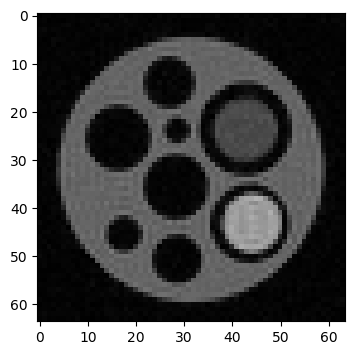

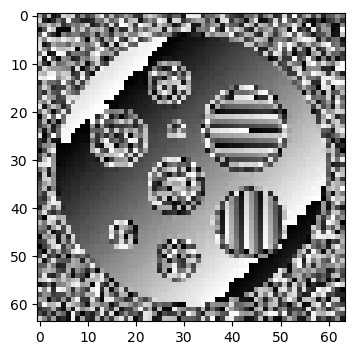

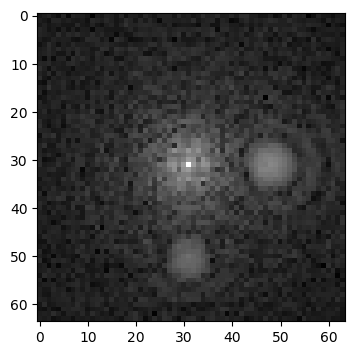

In [5]:
figure(1); figure(figsize=(4,4));imshow(abs.(data1),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(angle.(data1),cmap="gray", interpolation="none");
figure(3); figure(figsize=(4,4));imshow(abs.(kSpaceData1).^0.3,cmap="gray", interpolation="none");


### Zero-filling part of the k-space data

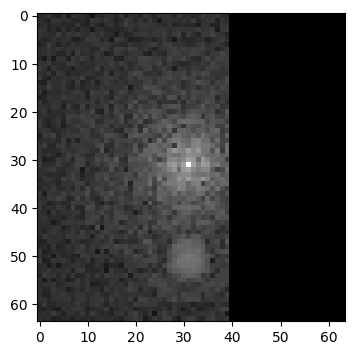

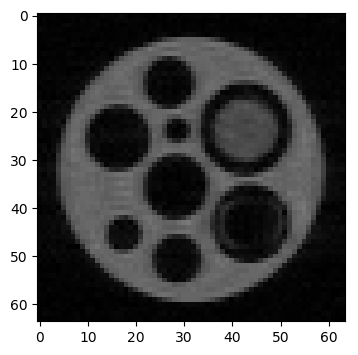

In [6]:
kSpaceData2 = deepcopy(kSpaceData1)
kSpaceData2[:,41:end]=0.
data2 = fftshift(fft(fftshift(kSpaceData2)));
figure(1); figure(figsize=(4,4));imshow(abs.(kSpaceData2).^0.3,cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(data2),cmap="gray", interpolation="none",vmin=0,vmax=5e6);

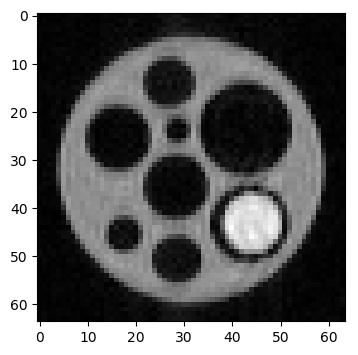

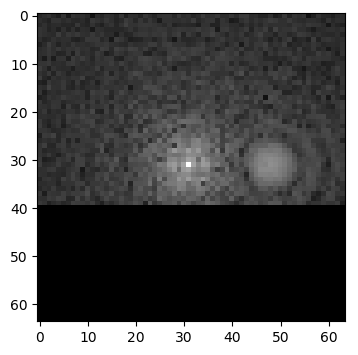

In [7]:
kSpaceData3 = deepcopy(kSpaceData1)
kSpaceData3[41:end,:]=0.
data3 = fftshift(fft(fftshift(kSpaceData3)));
figure(1); figure(figsize=(4,4));imshow(abs.(data3),cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData3).^0.3,cmap="gray", interpolation="none");

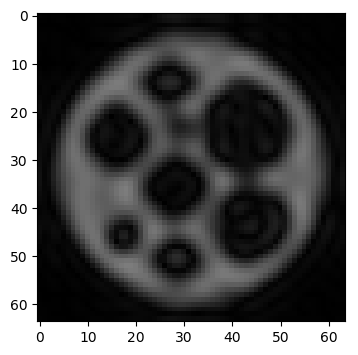

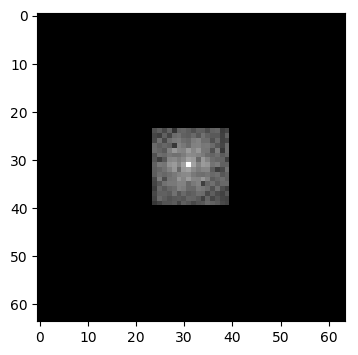

In [8]:
kSpaceData4 = deepcopy(kSpaceData1)
kSpaceData4[1:24,:]=0.
kSpaceData4[41:end,:]=0.
kSpaceData4[:,1:24]=0.
kSpaceData4[:,41:end]=0.
data4 = fftshift(fft(fftshift(kSpaceData4)));
figure(1); figure(figsize=(4,4));imshow(abs.(data4),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData4).^0.3,cmap="gray", interpolation="none");

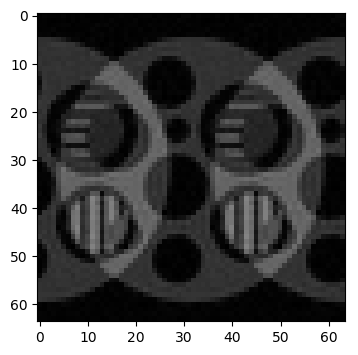

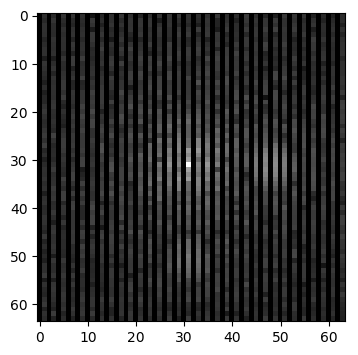

In [9]:
kSpaceData5 = deepcopy(kSpaceData1)
kSpaceData5[:,1:2:end]=0.
data5 = fftshift(fft(fftshift(kSpaceData5)));
figure(1); figure(figsize=(4,4));imshow(abs.(data5),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData5).^0.3,cmap="gray", interpolation="none");

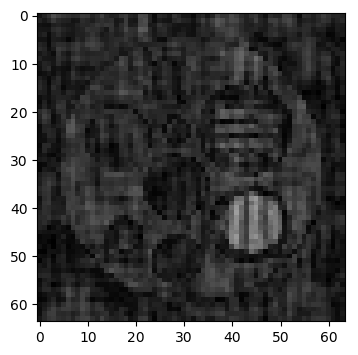

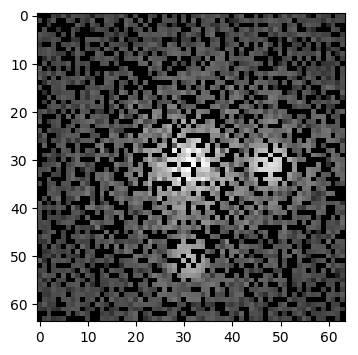

In [34]:
kSpaceData6 = deepcopy(kSpaceData1)
L = randperm(length(kSpaceData6[:]))
L2 = L[1:Int64(round(length(kSpaceData6[:])/3))]
kSpaceData6[L2]=0;
data6 = fftshift(fft(fftshift(kSpaceData6)));
figure(1); figure(figsize=(4,4));imshow(abs.(data6),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData6).^0.3,cmap="gray", interpolation="none");

## Homework (Feb 7th 2018)
1. Reconstruct images from k-space data that have only high spatial-frequency information
2. Reconstruct images from k-space data that only have 25% of the data, with only $k_y$ lines 1,5,9,13... $\ne$ 0 
3. Simulate motion artifact (optional)
4. Write a one-page proposal for your research project